In [39]:
pip install setuptools==39.1.0

In [40]:
!pip install numpy==1.23.0

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from ML_workflow import import_data
from ML_workflow import preprocessing
from ML_workflow import set_models
from ML_workflow import feature_selection
from ML_workflow import split_datasets
from ML_workflow import training_scoring
from ML_workflow import plot_result


In [42]:
# Models import list
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
models=set_models()

In [44]:
banknote_data,kidney_data=import_data()

### Kidney Disease Dataset 

In [45]:
# Summarize the dataset : 
# # shape
print("Shape ="+str(kidney_data.shape))

Shape =(400, 26)


In [46]:
# # info about type
print(kidney_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [47]:
# # head
print(kidney_data.head(10))

   id   age     bp     sg   al   su       rbc        pc         pcc  \
0   0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1   1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2   2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3   3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4   4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5   5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6   6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7   7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8   8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9   9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   

           ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0  notpresent  ...   44   7800  5.2  yes  yes   no  good   no   no   
1  notpresent  ...   38   6000  NaN   no   no   no  good   no   no   
2  notpr

In [48]:
# # descriptions
print(kidney_data.describe())

               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006 

We can see that there are missing values with some counts that are bellow 400.

In [49]:
#How many nan values are present
kidney_data.isna().sum().sort_values(ascending = False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

We can see that there are a lot of nan values in many of the 25 features

In [50]:
#Preprocessing the data
kidney_data=preprocessing(kidney_data)


In [51]:
#Checking post preprocessing
kidney_data.isna().sum().sort_values(ascending = False)

id                0
age               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
pot               0
sod               0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
bp                0
classification    0
dtype: int64

We have filled all missing numerical values with the mean value,  and replaced all the nan values with the "unknown" category, hence ending the preprocessing step 

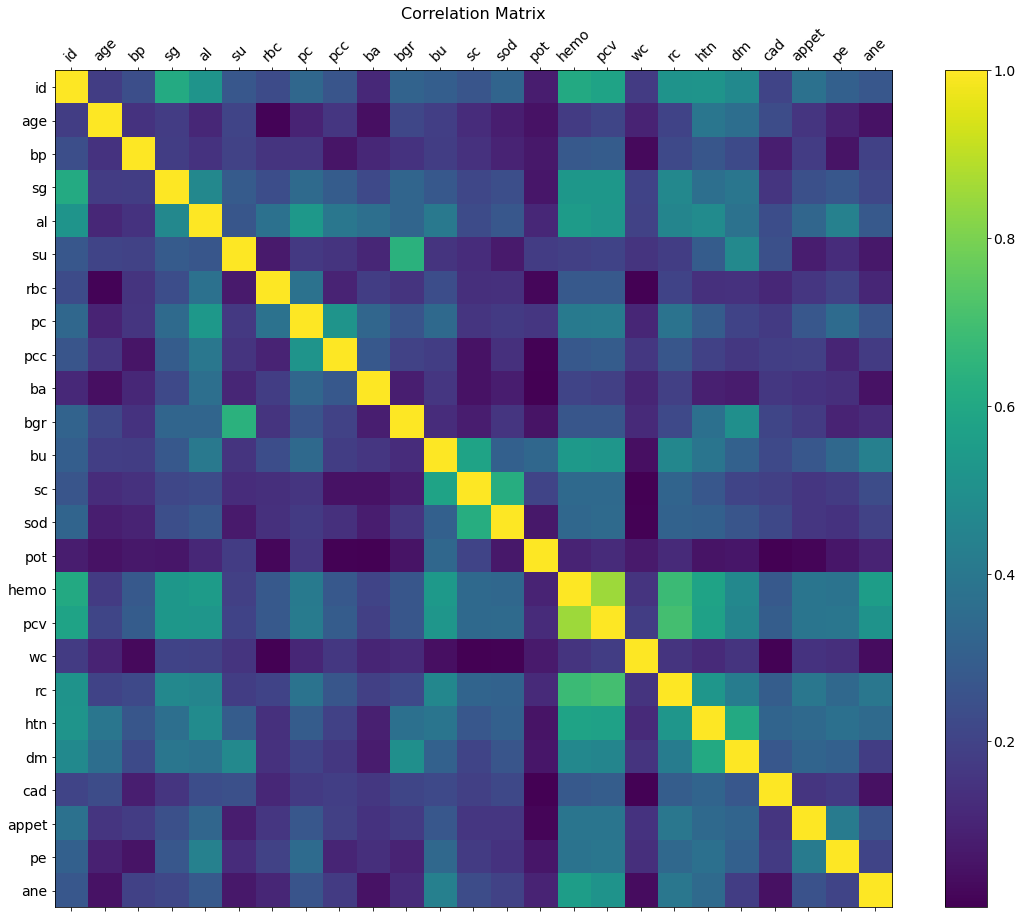

In [52]:
useful_data=feature_selection(kidney_data)


In [53]:
useful_data


['hemo', 'htn', 'su', 'bu', 'sod', 'id', 'pcv', 'bp', 'rc', 'age', 'ba', 'pe']

In [54]:
X_train, X_test, y_train, y_test = split_datasets(kidney_data, useful_data)

(400, 12)


In [55]:
scores= training_scoring(X_train,y_train,models)

Logistic Regression 1.0
{'SVM with linear kernel': 0.996875, 'SVM with polynomial (degree 2) kernel': 0.971875, 'SVM with RBF kernel': 0.996875, 'SVM with sigmoid kernel': 0.990625, 'Stochastic Gradient Descent': 0.996875, 'Decision Trees': 0.996875, 'Bayesian classifier': 0.85625, 'Random Forest': 0.996875, 'Neural Network': 0.996875, 'Logistic Regression': 1.0}


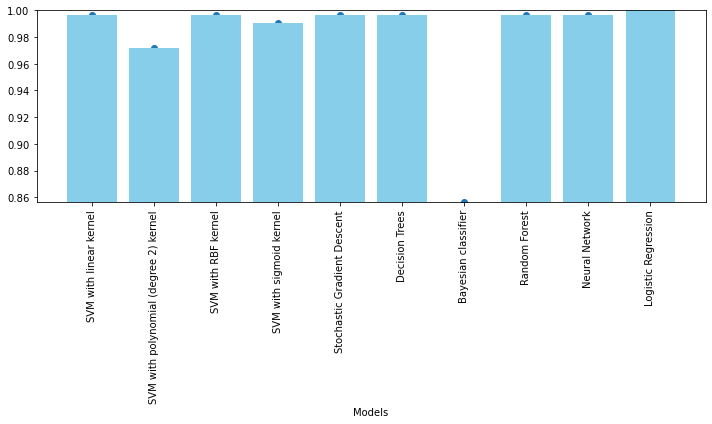

In [56]:
plot_result(scores)

### Banknote Authentification Dataset 

In [57]:
# Summarize the dataset : 
# # shape
print("Shape ="+str(banknote_data.shape))

Shape =(1372, 5)


In [58]:
# # info about type
print(banknote_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   variance of Wavelet Transformed image (continuous)   1372 non-null   float64
 1   skewness of Wavelet Transformed image (continuous)   1372 non-null   float64
 2   curtosis of Wavelet Transformed image (continuous)   1372 non-null   float64
 3   entropy of image (continuous)                        1372 non-null   float64
 4   class (integer)                                      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [59]:
# # head
print(banknote_data.head(10))

   variance of Wavelet Transformed image (continuous)   \
0                                            3.62160     
1                                            4.54590     
2                                            3.86600     
3                                            3.45660     
4                                            0.32924     
5                                            4.36840     
6                                            3.59120     
7                                            2.09220     
8                                            3.20320     
9                                            1.53560     

   skewness of Wavelet Transformed image (continuous)  \
0                                             8.6661    
1                                             8.1674    
2                                            -2.6383    
3                                             9.5228    
4                                            -4.4552    
5                  

In [60]:
# # descriptions
print(banknote_data.describe())

       variance of Wavelet Transformed image (continuous)   \
count                                        1372.000000     
mean                                            0.433735     
std                                             2.842763     
min                                            -7.042100     
25%                                            -1.773000     
50%                                             0.496180     
75%                                             2.821475     
max                                             6.824800     

       skewness of Wavelet Transformed image (continuous)  \
count                                        1372.000000    
mean                                            1.922353    
std                                             5.869047    
min                                           -13.773100    
25%                                            -1.708200    
50%                                             2.319650    
75%           

In [61]:
#How many nan values are present
banknote_data.isna().sum().sort_values(ascending = False)

variance of Wavelet Transformed image (continuous)     0
skewness of Wavelet Transformed image (continuous)     0
curtosis of Wavelet Transformed image (continuous)     0
entropy of image (continuous)                          0
class (integer)                                        0
dtype: int64

Seems like there is no need for filling nan values, but in case there are tipos or else we are going to perform preprocessing

In [62]:
#Preprocessing the data
banknote_data=preprocessing(banknote_data)


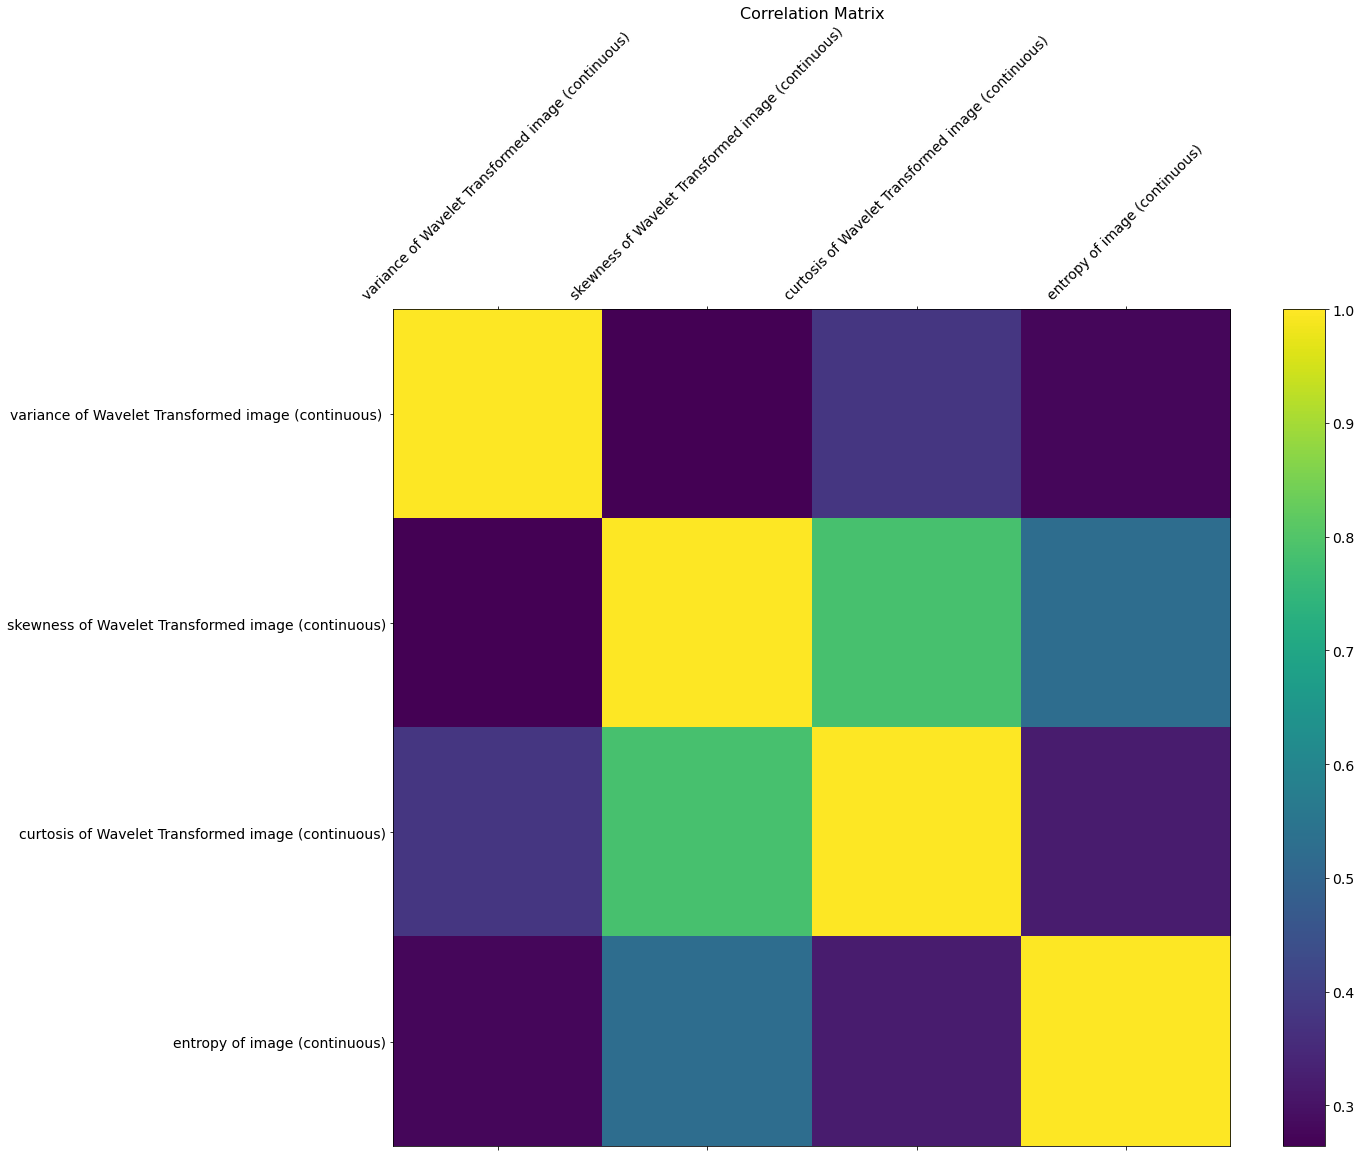

In [63]:
useful_data2=feature_selection(banknote_data)


In [64]:
useful_data2


['curtosis of Wavelet Transformed image (continuous)',
 'skewness of Wavelet Transformed image (continuous)']

In [65]:
X_train2, X_test2, y_train2, y_test2 = split_datasets(banknote_data, useful_data2)

(1372, 2)


In [66]:
scores2= training_scoring(X_train2,y_train2,models)

Random Forest 0.8832693911592994
{'SVM with linear kernel': 0.7611009174311926, 'SVM with polynomial (degree 2) kernel': 0.6489991659716431, 'SVM with RBF kernel': 0.8239449541284403, 'SVM with sigmoid kernel': 0.7064303586321935, 'Stochastic Gradient Descent': 0.7483736447039201, 'Decision Trees': 0.8786822351959966, 'Bayesian classifier': 0.5760216847372811, 'Random Forest': 0.8832693911592994, 'Neural Network': 0.8047789824854046, 'Logistic Regression': 0.7638698915763136}


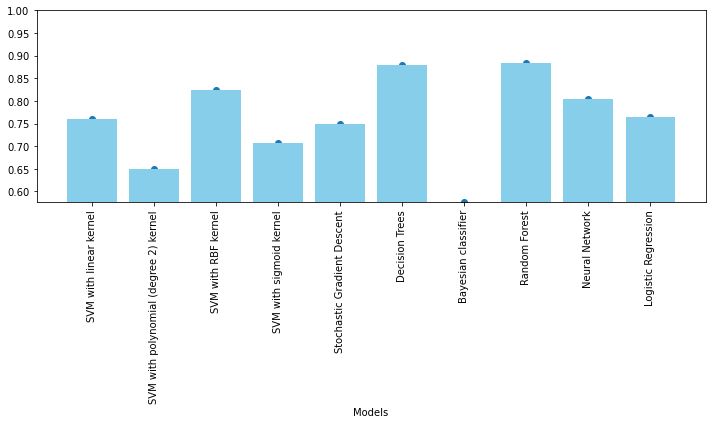

In [67]:
plot_result(scores2)

## Conclusion : 
We have performed multiple models and compared them all for one training set / validation set combination for both datasets. We notice that the kidney disease dataset gives better results and even a 100% accuracy for logistic regression. However, the number of features used to train the model can be high ( 12 ), for a bigger number of data ( more than 400 samples ), it could be expensive computationely speaking. Therefore, a principal component analysis might be interesting to reduce the dimensionality. 
However,  the banknote authentification dataset applied on our models gives various interesting results. Indeed, in both cases, the bayesian classifier is the less accurate, but then the Random Forest classifier gives the best score for banknote authentification, which raises the question about how much a "random" based model is able to predict whether a banknote is authentic or note. Therefore, further investigation is required to find an ethically more reliable model.